In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 2.Önişleme 
#image path 
img_path="C:/Users/musta/Downloads/spectrograms/"

folder_list=["0","1","2","3","4","5","6","7","8","9"]

classes=["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling",
           "gun_shot","jackhammer","siren","street_music"]

img_files_list=[]

# -b- görüntüleri ait oldukları etiketlerle listeye eklemek
for folder in folder_list:
    for img_file in os.listdir(img_path+folder):
        image=img_path+folder+"/"+img_file
        img_files_list.append([image,classes[int(folder)]])
        
df=pd.DataFrame(img_files_list,columns=["img","label"])
df_labels = {
    'air_conditioner' : 0,
    'car_horn' : 1,
    'children_playing' : 2,
    'dog_bark' : 3,
    'drilling': 4,
    'engine_idling':5,
    'gun_shot':6,
    'jackhammer':7,
    'siren':8,
    'street_music':9,
    
}
df['label_code'] = df['label'].map(df_labels)


X=[]

# Görüntüleri sırasıyla okuyamak, grayscale dönüşümü, resizing ve normalizasyon yapmak
dim = (37, 37)
for img in df["img"]:
    #grayscale
    img=cv2.imread(str(img),cv2.IMREAD_GRAYSCALE)
    #resizing
    img = cv2.resize(img,dim)
    #normalization
    img = img / 255
    X.append(img)

# -c- X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini oluşturmak.

y = df["label_code"]
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)


X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

X_train = X_train.reshape(-1,37,37,1)
X_test = X_test.reshape(-1,37,37,1)
X_val = X_val.reshape(-1,37,37,1)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_val = y_val.reshape(-1,)



#3.Model Hazırlanması ve Eğitimi 
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                       kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",
                       input_shape=(37,37,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,
                        kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,
                       kernel_size=(3,3),
                       strides=(1,1),
                       padding="same",
                       activation="relu",))


(6549, 37, 37)
(1637, 37, 37)
(546, 37, 37)
(6549,)
(1637,)
(546,)


In [45]:
model.add(tf.keras.layers.Flatten())

In [46]:
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))


In [47]:
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [48]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [49]:
X_train=tf.stack(X_train)
y_train=tf.stack(y_train)
X_val=tf.stack(X_val)
y_val=tf.stack(y_val)
results=model.fit(X_train,y_train,
                 batch_size=128,
                 epochs=50,validation_data=(X_val,y_val))


Epoch 1/50
52/52 [==============================] - 5s 81ms/step - loss: 2.1136 - accuracy: 0.2074 - val_loss: 1.7408 - val_accuracy: 0.3278
Epoch 2/50
52/52 [==============================] - 5s 87ms/step - loss: 1.8433 - accuracy: 0.3211 - val_loss: 1.5284 - val_accuracy: 0.4505
Epoch 3/50
52/52 [==============================] - 5s 91ms/step - loss: 1.6577 - accuracy: 0.3912 - val_loss: 1.3315 - val_accuracy: 0.5348
Epoch 4/50
52/52 [==============================] - 5s 94ms/step - loss: 1.5493 - accuracy: 0.4485 - val_loss: 1.1969 - val_accuracy: 0.5971
Epoch 5/50
52/52 [==============================] - 4s 86ms/step - loss: 1.4259 - accuracy: 0.4851 - val_loss: 1.1113 - val_accuracy: 0.6245
Epoch 6/50
52/52 [==============================] - 4s 82ms/step - loss: 1.3148 - accuracy: 0.5413 - val_loss: 1.1026 - val_accuracy: 0.6410
Epoch 7/50
52/52 [==============================] - 4s 83ms/step - loss: 1.2560 - accuracy: 0.5700 - val_loss: 1.0034 - val_accuracy: 0.6703
Epoch 8/50
52

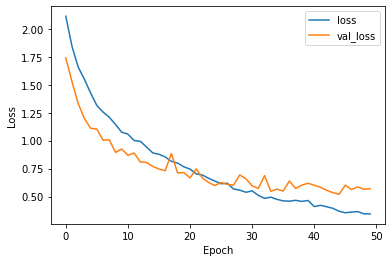

In [50]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

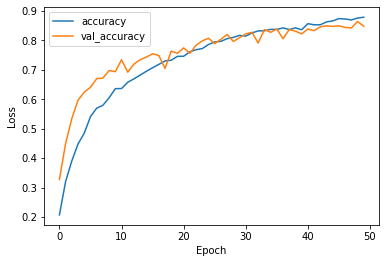

In [51]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
X_test=tf.stack(X_test)
y_test=tf.stack(y_test)
model.evaluate(X_test,y_test)

52/52 [==============================] - 0s 8ms/step - loss: 0.5327 - accuracy: 0.8668


[0.5327171683311462, 0.8668295741081238]